In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


(CVXPY) May 21 07:22:49 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: 找不到指定的模块。')


# Problem4

In [2]:
mu_1 = np.array([0,0])
mu_2 = np.array([4,2])
Sigma_1 = np.array([[4,-1],[-1,1]])
Sigma_2 = np.array([[1,1],[1,2]])
dim = 2

In [3]:
w = cp.Variable(dim)
evalue_1, evector_1 = np.linalg.eig(Sigma_1)
half_Sigma_1 = evector_1 @ np.diag(np.sqrt(evalue_1)) @ evector_1.T
evalue_2, evector_2 = np.linalg.eig(Sigma_2)
half_Sigma_2 = evector_2 @ np.diag(np.sqrt(evalue_2)) @ evector_2.T
goal = cp.norm(half_Sigma_1 @w,2)+cp.norm(half_Sigma_2@w,2)
soc_constraints = [w @ (mu_2-mu_1) == 1]
prob = cp.Problem(cp.Minimize(goal),soc_constraints)
prob.solve()
w_opt = w.value
k_opt = 1/(np.sqrt(w_opt @ Sigma_1 @ w_opt.T)+np.sqrt(w_opt @ Sigma_2 @ w_opt.T))
print("k_opt:",k_opt)

k_opt: 1.512154700499445


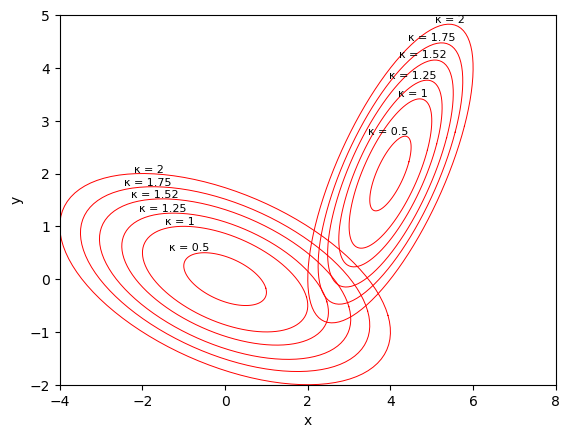

In [5]:
mu_mean = (mu_1 + mu_2) / 2
plt.xlim(mu_mean[0] - 6, mu_mean[0] + 6)
plt.ylim(mu_mean[1] - 3, mu_mean[1] + 4)
plt.xlabel("x")
plt.ylabel("y")
def draw(k, flag):
    mu = mu_1
    Sigma = Sigma_1
    if flag == 2:
        mu = mu_2
        Sigma = Sigma_2
    eigenvalues, eigenvectors = np.linalg.eig(Sigma)
    half_Sigma = eigenvectors @ np.diag(np.sqrt(eigenvalues)) @ eigenvectors.T
    u = np.linspace(0, 2 * np.pi, 100)
    x = []
    y = []
    for i in range(100):
        cord = np.array([k * np.cos(u[i]), k * np.sin(u[i])])
        cord = mu + half_Sigma @ cord
        x.append(cord[0])
        y.append(cord[1])
    plt.plot(x, y, color='red', linewidth=0.7,label=f'κ = {k}')
    if flag == 2:
        plt.text(x[0], y[20], f'κ = {k}', ha='right', va='bottom',fontsize=8)
    else:
        plt.text(x[28], y[28], f'κ = {k}', ha='right', va='bottom',fontsize=8)
k_values = [0.5,1,1.25,1.52,1.75,2]
for k in k_values:
    draw(k, 1)
    draw(k, 2)
plt.show()